In [1]:
#1. Introduction
#1.1 Description of the Problem
#The population of London has grown considerably over the last decades. London is very diverse. It represents what is called the reflection of the old British Empire. In London, you can get fresh food supplies from Africa. One begins to wonder how efficient the supply mechanism is.

#The real deal is that as much as there are many fine restaurants in London – Asian, Middle Eastern, Latin and American restaurants, you can struggle to find good place to dine in the finest of West African cuisine that has combination of Nigerian, Ghanaian, Cameroonian, Senegalese and more.

#Eating in a cosy environment with a blend of multicultural background and finely made West African dishes, on time and on point in a London location accessible to tourists, within central London and not far from the "unofficial" capital african market place - Peckham.

#1.2 Discussion of the Background
#My client, a successful restaurant chain in Africa is looking to expand operation into Europe through London. They want to create a high-end restaurant that comes with organic mix and healthy. Their target is not only West Africans, but they are pro-organic and healthy eating. To them every meal counts and counts as a royal when you eat.

#Since the London demography is so big, my client needs deeper insight from available data in other to decide where to establish the first Europe “palace” restaurant. This company spends a lot on research and provides customers with data insight into the ingredients used at restaurants.

#1.3 Target Audience
#Considering the diversity of London, there is a high multicultural sense. London is a place where different shades live. As such, in the search for an high-end African-inclined restaurant, there is a high shortage. The target audience is broad, it ranges from Londoners, tourists and those who are passionate about organic food.


#2. Data
#2.1 Description of Data
#This project will rely on public data from Wikipedia and Foursquare.

#2.1.1 Dataset 1:
#In this project, London will be used as synonymous to the "Greater London Area" in this project. Within the Greater London Area, there are areas that are within the London Area Postcode. The focus of this project will be the nieghbourhoods are that are within the London Post Code area.

#The London Area consists of 32 Boroughs and the "City of London". Our data will be from the link - Greater London Area <https://en.wikipedia.org/wiki/List_of_areas_of_London >

#The web scrapped of the Wikipedia page for the Greater London Area data is provided below:

In [2]:

# library for BeautifulSoup
from bs4 import BeautifulSoup

# library to handle data in a vectorized manner
import numpy as np

# library for data analsysis
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# library to handle JSON files
import json
print('numpy, pandas, ..., imported...')

!pip -q install geopy
# conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
print('geopy installed...')
# convert an address into latitude and longitude values
from geopy.geocoders import Nominatim
print('Nominatim imported...')

# library to handle requests
import requests
print('requests imported...')

# tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize
print('json_normalize imported...')

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
print('matplotlib imported...')

# import k-means from clustering stage
from sklearn.cluster import KMeans
print('Kmeans imported...')

# install the Geocoder
!pip -q install geocoder
import geocoder

# import time
import time

# !conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip -q install folium
print('folium installed...')
import folium # map rendering library
print('folium imported...')
print('...Done')

numpy, pandas, ..., imported...
geopy installed...
Nominatim imported...
requests imported...
json_normalize imported...
matplotlib imported...
Kmeans imported...
folium installed...
folium imported...
...Done


In [3]:
wikipedia_link = 'https://en.wikipedia.org/wiki/List_of_areas_of_London'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:64.0) Gecko/20100101 Firefox/64.0'}
wikipedia_page = requests.get(wikipedia_link, headers = headers)
wikipedia_page

<Response [200]>

In [4]:
# Cleans html file
soup = BeautifulSoup(wikipedia_page.content, 'html.parser')
# This extracts the "tbody" within the table where class is "wikitable sortable"
table = soup.find('table', {'class':'wikitable sortable'}).tbody

In [5]:
# Extracts all "tr" (table rows) within the table above
rows = table.find_all('tr')

In [6]:
# Extracts the column headers, removes and replaces possible '\n' with space for the "th" tag
columns = [i.text.replace('\n', '')
           for i in rows[0].find_all('th')]

In [7]:
# Converts columns to pd dataframe
df = pd.DataFrame(columns = columns)
df

,Location,London borough,Post town,Postcode district,Dial code,OS grid ref


In [8]:
for i in range(1, len(rows)):
    tds = rows[i].find_all('td')
    
    
    if len(tds) == 7:
        values = [tds[0].text, tds[1].text, tds[2].text.replace('\n', ''.replace('\xa0','')), tds[3].text, tds[4].text.replace('\n', ''.replace('\xa0','')), tds[5].text.replace('\n', ''.replace('\xa0','')), tds[6].text.replace('\n', ''.replace('\xa0',''))]
    else:
        values = [td.text.replace('\n', '').replace('\xa0','') for td in tds]
        
        df = df.append(pd.Series(values, index = columns), ignore_index = True)

        df

In [9]:
df.head(5)


,Location,London borough,Post town,Postcode district,Dial code,OS grid ref
0,Abbey Wood,"Bexley, Greenwich [7]",LONDON,SE2,020,TQ465785
1,Acton,"Ealing, Hammersmith and Fulham[8]",LONDON,"W3, W4",020,TQ205805
2,Addington,Croydon[8],CROYDON,CR0,020,TQ375645
3,Addiscombe,Croydon[8],CROYDON,CR0,020,TQ345665
4,Albany Park,Bexley,"BEXLEY, SIDCUP","DA5, DA14",020,TQ478728


In [10]:
df = df.rename(index=str, columns = {'Location': 'Location', 'London\xa0borough': 'Borough', 'Post town': 'Post-town', 'Postcode\xa0district': 'Postcode', 'Dial\xa0code': 'Dial-code', 'OS grid ref': 'OSGridRef'})


In [11]:
df.head(5)


,Location,Borough,Post-town,Postcode,Dial-code,OSGridRef
0,Abbey Wood,"Bexley, Greenwich [7]",LONDON,SE2,020,TQ465785
1,Acton,"Ealing, Hammersmith and Fulham[8]",LONDON,"W3, W4",020,TQ205805
2,Addington,Croydon[8],CROYDON,CR0,020,TQ375645
3,Addiscombe,Croydon[8],CROYDON,CR0,020,TQ345665
4,Albany Park,Bexley,"BEXLEY, SIDCUP","DA5, DA14",020,TQ478728


In [12]:
df['Borough'] = df['Borough'].map(lambda x: x.rstrip(']').rstrip('0123456789').rstrip('['))


In [13]:
df.shape


(533, 6)

In [14]:
df.head(5)


,Location,Borough,Post-town,Postcode,Dial-code,OSGridRef
0,Abbey Wood,"Bexley, Greenwich",LONDON,SE2,020,TQ465785
1,Acton,"Ealing, Hammersmith and Fulham",LONDON,"W3, W4",020,TQ205805
2,Addington,Croydon,CROYDON,CR0,020,TQ375645
3,Addiscombe,Croydon,CROYDON,CR0,020,TQ345665
4,Albany Park,Bexley,"BEXLEY, SIDCUP","DA5, DA14",020,TQ478728


In [15]:
df0 = df.drop('Postcode', axis=1).join(df['Postcode'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('Postcode'))


In [16]:
df0.shape


(637, 6)

In [17]:
df1 = df0[['Location', 'Borough', 'Postcode', 'Post-town']].reset_index(drop=True)


In [18]:
df1.head(5)


,Location,Borough,Postcode,Post-town
0,Abbey Wood,"Bexley, Greenwich",SE2,LONDON
1,Acton,"Ealing, Hammersmith and Fulham",W3,LONDON
2,Acton,"Ealing, Hammersmith and Fulham",W4,LONDON
3,Angel,Islington,EC1,LONDON
4,Angel,Islington,N1,LONDON


In [19]:
df1.shape


(637, 4)

In [20]:
df2 = df1
df21 = df2[df2['Post-town'].str.contains('LONDON')]

In [21]:
df21.head(5)


,Location,Borough,Postcode,Post-town
0,Abbey Wood,"Bexley, Greenwich",SE2,LONDON
1,Acton,"Ealing, Hammersmith and Fulham",W3,LONDON
2,Acton,"Ealing, Hammersmith and Fulham",W4,LONDON
3,Angel,Islington,EC1,LONDON
4,Angel,Islington,N1,LONDON


In [22]:
df21.shape


(381, 4)

In [23]:
df3 = df21[['Location', 'Borough', 'Postcode']].reset_index(drop=True)


In [24]:
df3.head(10)


,Location,Borough,Postcode
0,Abbey Wood,"Bexley, Greenwich",SE2
1,Acton,"Ealing, Hammersmith and Fulham",W3
2,Acton,"Ealing, Hammersmith and Fulham",W4
3,Angel,Islington,EC1
4,Angel,Islington,N1
5,Church End,Brent,NW10
6,Church End,Barnet,N3
7,Clapham,"Lambeth, Wandsworth",SW4
8,Clerkenwell,Islington,EC1
9,Colindale,Barnet,NW9


In [25]:
df_london = df3
df_london.to_csv('LondonLocations.csv', index = False)

In [26]:
df_london.head(5)


,Location,Borough,Postcode
0,Abbey Wood,"Bexley, Greenwich",SE2
1,Acton,"Ealing, Hammersmith and Fulham",W3
2,Acton,"Ealing, Hammersmith and Fulham",W4
3,Angel,Islington,EC1
4,Angel,Islington,N1


In [27]:
df_london.Postcode = df_london.Postcode.str.strip()


In [28]:
df_london.head(5)


,Location,Borough,Postcode
0,Abbey Wood,"Bexley, Greenwich",SE2
1,Acton,"Ealing, Hammersmith and Fulham",W3
2,Acton,"Ealing, Hammersmith and Fulham",W4
3,Angel,Islington,EC1
4,Angel,Islington,N1


In [29]:
df_se = df_london[df_london['Postcode'].str.startswith(('SE'))].reset_index(drop=True)


In [30]:
df_se.head(10)


,Location,Borough,Postcode
0,Abbey Wood,"Bexley, Greenwich",SE2
1,Crofton Park,Lewisham,SE4
2,Crossness,Bexley,SE2
3,Crystal Palace,Bromley,SE19
4,Crystal Palace,Bromley,SE20
5,Crystal Palace,Bromley,SE26
6,Denmark Hill,Southwark,SE5
7,Deptford,Lewisham,SE8
8,Dulwich,Southwark,SE21
9,East Dulwich,Southwark,SE22


In [31]:
demograph_link = 'https://en.wikipedia.org/wiki/Demography_of_London'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:64.0) Gecko/20100101 Firefox/64.0'}
demograph_page = requests.get(demograph_link, headers = headers)
soup1 = BeautifulSoup(demograph_page.content, 'html.parser')
table1 = soup1.find('table', {'class':'wikitable sortable'}).tbody
rows1 = table1.find_all('tr')
columns1 = [i.text.replace('\n', '')
           for i in rows1[0].find_all('th')]

In [32]:
columns1


['Local authority', 'White', 'Mixed', 'Asian', 'Black', 'Other']

In [33]:
demo_london = pd.DataFrame(columns = columns1)


In [34]:
demo_london.head(5)


,Local authority,White,Mixed,Asian,Black,Other


In [35]:
for j in range(1, len(rows1)):
    tds1 = rows1[j].find_all('td')
    if len(tds1) == 7:
        values1 = [tds1[0].text, tds1[1].text, tds1[2].text.replace('\n', ''.replace('\xa0','')), tds1[3].text, tds1[4].text.replace('\n', ''.replace('\xa0','')), tds1[5].text.replace('\n', ''.replace('\xa0',''))]
    else:
        values1 = [td1.text.replace('\n', '').replace('\xa0','') for td1 in tds1]
        
        demo_london = demo_london.append(pd.Series(values1, index = columns1), ignore_index = True)

        



In [36]:
demo_london['Black'] = demo_london['Black'].astype('float')


In [37]:
demo_london_sorted = demo_london.sort_values(by='Black', ascending = False)


In [38]:
demo_london_sorted.head(5)


,Local authority,White,Mixed,Asian,Black,Other
22,Lewisham,53.5,7.4,9.3,27.2,2.6
27,Southwark,54.3,6.2,9.4,26.9,3.3
21,Lambeth,57.1,7.6,6.9,25.9,2.4
11,Hackney,54.7,6.4,10.5,23.1,5.3
7,Croydon,55.1,6.6,16.4,20.2,1.8


In [39]:
df_se


,Location,Borough,Postcode
0,Abbey Wood,"Bexley, Greenwich",SE2
1,Crofton Park,Lewisham,SE4
2,Crossness,Bexley,SE2
3,Crystal Palace,Bromley,SE19
4,Crystal Palace,Bromley,SE20
5,Crystal Palace,Bromley,SE26
6,Denmark Hill,Southwark,SE5
7,Deptford,Lewisham,SE8
8,Dulwich,Southwark,SE21
9,East Dulwich,Southwark,SE22


In [40]:
df_se_top = df_se[df_se['Borough'].isin(['Lewisham', 'Southwark', 'Lambeth', 'Hackney', 'Croydon'])].reset_index(drop=True)


In [41]:
df_se_top.head(5)


,Location,Borough,Postcode
0,Crofton Park,Lewisham,SE4
1,Denmark Hill,Southwark,SE5
2,Deptford,Lewisham,SE8
3,Dulwich,Southwark,SE21
4,East Dulwich,Southwark,SE22


In [42]:
df_se_top.shape


(46, 3)

In [43]:
df_se.shape


(80, 3)

In [44]:
def get_latlng(arcgis_geocoder):
    
    
    lat_lng_coords = None
    
    
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, London, United Kingdom'.format(arcgis_geocoder))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [45]:
sample = get_latlng('SE2')
sample

[51.492450000000076, 0.12127000000003818]

In [46]:
gg = geocoder.geocodefarm(sample, method = 'reverse')
gg

<[OK] Geocodefarm - Reverse [82 Harrow Manorway, Thamesmead South, SE2 9SW, United Kingdom]>

In [47]:
start = time.time()

postal_codes = df_se_top['Postcode']    
coordinates = [get_latlng(postal_code) for postal_code in postal_codes.tolist()]

end = time.time()
print("Time of execution: ", end - start, "seconds")

Time of execution:  40.21633577346802 seconds


In [48]:
df_se_loc = df_se_top


df_se_coordinates = pd.DataFrame(coordinates, columns = ['Latitude', 'Longitude'])
df_se_loc['Latitude'] = df_se_coordinates['Latitude']
df_se_loc['Longitude'] = df_se_coordinates['Longitude']

In [49]:
df_se_loc.head(5)


,Location,Borough,Postcode,Latitude,Longitude
0,Crofton Park,Lewisham,SE4,51.46268,-0.03558
1,Denmark Hill,Southwark,SE5,51.47480,-0.09313
2,Deptford,Lewisham,SE8,51.48114,-0.02467
3,Dulwich,Southwark,SE21,51.44100,-0.08897
4,East Dulwich,Southwark,SE22,51.45256,-0.07076


In [50]:
df_se_loc.to_csv('SELondonLocationsCoordinates.csv', index = False)


In [51]:
df_se_loc.shape


(46, 5)

In [52]:
#Please note that due to privacy, the personal Foursquare Credential has been stored in a .json <fsquarecredential.json> and called appropriately as shown below:



In [53]:
import json
filename = 'foursquareapidata.json'
with open(filename) as f:
    data = json.load(f)

In [54]:
CLIENT_ID = data['CLIENT_ID'] # your Foursquare ID
CLIENT_SECRET = data['CLIENT_SECRET'] # your Foursquare Secret
VERSION = data['VERSION'] # Foursquare API version

In [55]:
#3. Methodology
#3.1 Data Exploration
#3.1.1 Single Neighbourhood
#An initial exploration of a single Neighbourhood within the London area was done to examine the Foursquare workability. The Lewisham Borough postcode SE13 and Location - Lewisham is used for this.

In [56]:
se_df = df_se_loc.reset_index().drop('index', axis = 1)


In [57]:
se_df.shape


(46, 5)

In [58]:
se_df


,Location,Borough,Postcode,Latitude,Longitude
0,Crofton Park,Lewisham,SE4,51.46268,-0.03558
1,Denmark Hill,Southwark,SE5,51.47480,-0.09313
2,Deptford,Lewisham,SE8,51.48114,-0.02467
3,Dulwich,Southwark,SE21,51.44100,-0.08897
4,East Dulwich,Southwark,SE22,51.45256,-0.07076
5,Elephant and Castle,Southwark,SE1,51.49996,-0.09568
6,Elephant and Castle,Southwark,SE11,51.49084,-0.11108
7,Elephant and Castle,Southwark,SE17,51.48764,-0.09542
8,Bankside,Southwark,SE1,51.49996,-0.09568
9,Forest Hill,Lewisham,SE23,51.44122,-0.04764


In [59]:
se_df.loc[se_df['Location'] == 'Lewisham']


,Location,Borough,Postcode,Latitude,Longitude
20,Lewisham,Lewisham,SE13,51.46196,-0.00754


In [60]:
se_df.loc[20, 'Location']


'Lewisham'

In [61]:
lewisham_lat = se_df.loc[20, 'Latitude']
lewisham_long = se_df.loc[20, 'Longitude']
lewisham_loc = se_df.loc[20, 'Location']
lewisham_postcode = se_df.loc[20, 'Postcode']

print('The latitude and longitude values of {} with postcode {}, are {}, {}.'.format(lewisham_loc,
                                                                                         lewisham_postcode,
                                                                                         lewisham_lat,
                                                                                         lewisham_long))

The latitude and longitude values of Lewisham with postcode SE13, are 51.46196000000003, -0.007539999999949032.


In [62]:
LIMIT = 100 
radius = 2000 
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    lewisham_lat, 
    lewisham_long, 
    radius, 
    LIMIT)


url

'https://api.foursquare.com/v2/venues/explore?&client_id=DBJ2R5XQF0IQ3UZ0RCQS1KNDNNLT1YOEL4OH2BF3QSAZKDYD&client_secret=FY5B3PWRURELM4RU505VQZHQLQ1NM2ATQLCJC0WYC5H4EO00&v=20200714&ll=51.46196000000003,-0.007539999999949032&radius=2000&limit=100'

In [63]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f0d91d7889e093619ba780c'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Lewisham Central',
  'headerFullLocation': 'Lewisham Central, London',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 182,
  'suggestedBounds': {'ne': {'lat': 51.47996001800005,
    'lng': 0.021296961190459426},
   'sw': {'lat': 51.44395998200002, 'lng': -0.03637696119035749}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '535823bc498ec8d8da9aad5f',
       'name': 'Street Feast Model Market',
       'location': {'address': '196 Lewisham High St',
        'crossStreet': 'entrance at Molesworth St',
        'lat': 51.46020945743763,
        'lng': -0.01

In [64]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [65]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) 
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]


nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)


nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

<ipython-input-65-4f2a209ce0c2>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues)


In [66]:
nearby_venues


,name,categories,lat,lng
0,Street Feast Model Market,Street Food Gathering,51.460209,-0.012199
1,Maggie's Kitchen,Café,51.465380,-0.011213
2,Gennaro Delicatessan,Deli / Bodega,51.461765,-0.009726
3,Levante Pide Restaurant,Turkish Restaurant,51.459848,-0.011476
4,Levante restaurant,Restaurant,51.462072,-0.009491
5,Manor House Gardens,Park,51.456686,0.004684
6,Corte,Coffee Shop,51.459776,-0.011554
7,The Sausage Man,Food Truck,51.462507,-0.010248
8,Blackheath Farmers' Market,Farmers Market,51.465913,0.007945
9,Buenos Aires Cafe,Argentinian Restaurant,51.467260,0.007083


In [67]:
nearby_venues_lewisham_unique = nearby_venues['categories'].value_counts().to_frame(name='Count')


In [68]:
nearby_venues_lewisham_unique.head(5)


,Count
Pub,12
Café,9
Gastropub,6
Park,6
Garden,4


In [69]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))


100 venues were returned by Foursquare.


In [70]:
def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
    
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
       
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [71]:
se_venues = getNearbyVenues(names=se_df['Location'],
                                   latitudes=se_df['Latitude'],
                                   longitudes=se_df['Longitude']
                                  )

Crofton Park
Denmark Hill
Deptford
Dulwich
East Dulwich
Elephant and Castle
Elephant and Castle
Elephant and Castle
Bankside
Forest Hill
Gipsy Hill
Gipsy Hill
Grove Park
Herne Hill
Hither Green
Honor Oak
Ladywell
Ladywell
Lambeth
Lee
Lewisham
New Cross
Newington
Newington
Nunhead
Oval
Bellingham
Peckham
Rotherhithe
Selhurst
Bermondsey
South Norwood
Southend
St Johns
Surrey Quays
Tulse Hill
Tulse Hill
Upper Norwood
Walworth
Blackheath
West Norwood
Brixton
Brockley
Camberwell
Catford
Chinbrook


In [72]:
se_venues.shape


(4219, 7)

In [73]:
len(se_venues)


4219

In [74]:
se_venues['Neighbourhood'].value_counts()
se_venues.to_csv('se_venues.csv')

In [75]:
se_venues.head(5)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Crofton Park,51.46268,-0.03558,Browns Of Brockley,51.464513,-0.037346,Coffee Shop
1,Crofton Park,51.46268,-0.03558,Brockley's Rock,51.459457,-0.033868,Fish & Chips Shop
2,Crofton Park,51.46268,-0.03558,The Orchard,51.463678,-0.035699,Gastropub
3,Crofton Park,51.46268,-0.03558,Waterintobeer,51.463712,-0.038826,Beer Store
4,Crofton Park,51.46268,-0.03558,Brockley Brewery (The Brockley Brewing Company),51.462265,-0.036132,Brewery


In [76]:
se_venues.groupby('Neighbourhood').count()


,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Bankside,100,100,100,100,100,100
Bellingham,68,68,68,68,68,68
Bermondsey,100,100,100,100,100,100
Blackheath,92,92,92,92,92,92
Brixton,100,100,100,100,100,100
Brockley,100,100,100,100,100,100
Camberwell,100,100,100,100,100,100
Catford,68,68,68,68,68,68
Chinbrook,53,53,53,53,53,53


In [77]:
print('There are {} uniques categories.'.format(len(se_venues['Venue Category'].unique())))


There are 193 uniques categories.


In [78]:
se_venue_unique_count = se_venues['Venue Category'].value_counts().to_frame(name='Count')


In [79]:
se_venue_unique_count.head(5)


,Count
Pub,458
Coffee Shop,303
Café,286
Park,234
Grocery Store,156


In [80]:
se_venue_unique_count.describe()


,Count
count,193.000000
mean,21.860104
std,50.462611
min,1.000000
25%,4.000000
50%,8.000000
75%,19.000000
max,458.000000


In [82]:
# #3.2 Clustering
# For this section, the neighbourhoods in South East London will be clustered based on the processed data obtained above.

# #3.2.1 Libraries
# To get started, all the necessary libraries have been called in the libraries section above.

# #3.2.2 Map Visualization
# Using the geopy library, the latitude and longitude values of London is obtained.

In [83]:
address = 'London, United Kingdom'

geolocator = Nominatim(user_agent="ln_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London are 51.5073219, -0.1276474.


In [84]:
map_london = folium.Map(location = [latitude, longitude], zoom_start = 12)
map_london

In [85]:
for lat, lng, borough, loc in zip(se_df['Latitude'], 
                                  se_df['Longitude'],
                                  se_df['Borough'],
                                  se_df['Location']):
    label = '{} - {}'.format(loc, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_london)  
    
display(map_london)

In [86]:
type(se_df)


pandas.core.frame.DataFrame

In [87]:
se_onehot = pd.get_dummies(se_venues[['Venue Category']], prefix = "", prefix_sep = "")


In [88]:
se_onehot['Neighbourhood'] = se_venues['Neighbourhood']


In [89]:
fixed_columns = [se_onehot.columns[-1]] + list(se_onehot.columns[:-1])
se_onehot = se_onehot[fixed_columns]

In [90]:
se_onehot.head(5)


,Neighbourhood,African Restaurant,American Restaurant,Antique Shop,Aquarium,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bakery,Bar,Beach,Beer Bar,Beer Garden,Beer Store,Bike Shop,Bistro,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Building,Burger Joint,Bus Station,Bus Stop,Café,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Community Center,Concert Hall,Convenience Store,Creperie,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distillery,Doner Restaurant,Dumpling Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Forest,French Restaurant,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Himalayan Restaurant,Historic Site,History Museum,Hookah Bar,Hostel,Hotel,Hungarian Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Kebab Restaurant,Kids Store,Lake,Latin American Restaurant,Lebanese Restaurant,Locksmith,Malay Restaurant,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Modern European Restaurant,Monument / Landmark,Motorcycle Shop,Movie Theater,Museum,Music Venue,Nature Preserve,New American Restaurant,Observatory,Okonomiyaki Restaurant,Outdoor Sculpture,Pakistani Restaurant,Park,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pizza Place,Planetarium,Platform,Playground,Plaza,Polish Restaurant,Pool,Pool Hall,Portuguese Restaurant,Pub,RV Park,Ramen Restaurant,Record Shop,Recreation Center,Restaurant,Rugby Pitch,Sake Bar,Salad Place,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shopping Mall,Shopping Plaza,Skate Park,Soccer Field,Soccer Stadium,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sri Lankan Restaurant,Stadium,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Tourist Information Center,Track,Track Stadium,Trail,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Windmill,Wine Bar,Wine Shop,Xinjiang Restaurant,Yoga Studio,Zoo Exhibit
0,Crofton Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Crofton Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Crofton Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Crofton Park,0,0,0,0,0,0,0,0,0,0,0,0,0

In [91]:
se_onehot.loc[se_onehot['African Restaurant'] != 0]


,Neighbourhood,African Restaurant,American Restaurant,Antique Shop,Aquarium,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bakery,Bar,Beach,Beer Bar,Beer Garden,Beer Store,Bike Shop,Bistro,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Building,Burger Joint,Bus Station,Bus Stop,Café,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Community Center,Concert Hall,Convenience Store,Creperie,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distillery,Doner Restaurant,Dumpling Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Forest,French Restaurant,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Himalayan Restaurant,Historic Site,History Museum,Hookah Bar,Hostel,Hotel,Hungarian Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Kebab Restaurant,Kids Store,Lake,Latin American Restaurant,Lebanese Restaurant,Locksmith,Malay Restaurant,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Modern European Restaurant,Monument / Landmark,Motorcycle Shop,Movie Theater,Museum,Music Venue,Nature Preserve,New American Restaurant,Observatory,Okonomiyaki Restaurant,Outdoor Sculpture,Pakistani Restaurant,Park,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pizza Place,Planetarium,Platform,Playground,Plaza,Polish Restaurant,Pool,Pool Hall,Portuguese Restaurant,Pub,RV Park,Ramen Restaurant,Record Shop,Recreation Center,Restaurant,Rugby Pitch,Sake Bar,Salad Place,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shopping Mall,Shopping Plaza,Skate Park,Soccer Field,Soccer Stadium,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sri Lankan Restaurant,Stadium,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Tourist Information Center,Track,Track Stadium,Trail,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Windmill,Wine Bar,Wine Shop,Xinjiang Restaurant,Yoga Studio,Zoo Exhibit
141,Denmark Hill,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
630,Elephant and Castle,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
716,Elephant and Castle,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
997,Gipsy Hill,1,0,0

In [92]:
se_onehot.loc[se_onehot['Neighbourhood'] == 'Lewisham']


,Neighbourhood,African Restaurant,American Restaurant,Antique Shop,Aquarium,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bakery,Bar,Beach,Beer Bar,Beer Garden,Beer Store,Bike Shop,Bistro,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Building,Burger Joint,Bus Station,Bus Stop,Café,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Community Center,Concert Hall,Convenience Store,Creperie,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distillery,Doner Restaurant,Dumpling Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Forest,French Restaurant,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Himalayan Restaurant,Historic Site,History Museum,Hookah Bar,Hostel,Hotel,Hungarian Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Kebab Restaurant,Kids Store,Lake,Latin American Restaurant,Lebanese Restaurant,Locksmith,Malay Restaurant,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Modern European Restaurant,Monument / Landmark,Motorcycle Shop,Movie Theater,Museum,Music Venue,Nature Preserve,New American Restaurant,Observatory,Okonomiyaki Restaurant,Outdoor Sculpture,Pakistani Restaurant,Park,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pizza Place,Planetarium,Platform,Playground,Plaza,Polish Restaurant,Pool,Pool Hall,Portuguese Restaurant,Pub,RV Park,Ramen Restaurant,Record Shop,Recreation Center,Restaurant,Rugby Pitch,Sake Bar,Salad Place,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shopping Mall,Shopping Plaza,Skate Park,Soccer Field,Soccer Stadium,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sri Lankan Restaurant,Stadium,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Tourist Information Center,Track,Track Stadium,Trail,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Windmill,Wine Bar,Wine Shop,Xinjiang Restaurant,Yoga Studio,Zoo Exhibit
1870,Lewisham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1871,Lewisham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1872,Lewisham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1873,Lewisham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [93]:
se_onehot.to_csv('selondon_onehot.csv', index = False)


In [94]:
se_onehot.shape


(4219, 194)

In [95]:
se_grouped = se_onehot.groupby('Neighbourhood').mean().reset_index()
se_grouped.head()


,Neighbourhood,African Restaurant,American Restaurant,Antique Shop,Aquarium,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bakery,Bar,Beach,Beer Bar,Beer Garden,Beer Store,Bike Shop,Bistro,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Building,Burger Joint,Bus Station,Bus Stop,Café,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Community Center,Concert Hall,Convenience Store,Creperie,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distillery,Doner Restaurant,Dumpling Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Forest,French Restaurant,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Himalayan Restaurant,Historic Site,History Museum,Hookah Bar,Hostel,Hotel,Hungarian Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Kebab Restaurant,Kids Store,Lake,Latin American Restaurant,Lebanese Restaurant,Locksmith,Malay Restaurant,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Modern European Restaurant,Monument / Landmark,Motorcycle Shop,Movie Theater,Museum,Music Venue,Nature Preserve,New American Restaurant,Observatory,Okonomiyaki Restaurant,Outdoor Sculpture,Pakistani Restaurant,Park,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pizza Place,Planetarium,Platform,Playground,Plaza,Polish Restaurant,Pool,Pool Hall,Portuguese Restaurant,Pub,RV Park,Ramen Restaurant,Record Shop,Recreation Center,Restaurant,Rugby Pitch,Sake Bar,Salad Place,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shopping Mall,Shopping Plaza,Skate Park,Soccer Field,Soccer Stadium,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sri Lankan Restaurant,Stadium,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Tourist Information Center,Track,Track Stadium,Trail,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Windmill,Wine Bar,Wine Shop,Xinjiang Restaurant,Yoga Studio,Zoo Exhibit
0,Bankside,0.00,0.01000,0.0,0.0,0.00000,0.01,0.02,0.0,0.01,0.0,0.0,0.00,0.030000,0.010000,0.01,0.00,0.0,0.01000,0.01,0.0,0.0,0.0,0.01000,0.00,0.000000,0.02,0.0,0.000000,0.020000,0.00,0.01,0.00000,0.0,0.000000,0.020000,0.100000,0.0,0.0,0.00000,0.01,0.01,0.00,0.0,0.00,0.00,0.00000,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.01,0.0,0.00,0.0,0.00,0.0,0.01000,0.000000,0.01,0.0,0.0,0.0,0.01,0.00,0.0,0.0,0.01000,0.0,0.000000,0.00,0.030000,0.0,0.0,0.01000,0.0,0.0,0.0,0.0,0.0,0.000000,0.030000,0.01000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.01,0.0,0.0,0.05000,0.0,0.01,0.000000,0.0,0.000000,0.00000,0.050000,0.000000,0.0,0.01,0.00,0.0,0.0,0.0,0.0,0.00000,0.0,0.00,0.0,0.0,0.00,0.0,0.01,0.0,0.0,0.01,0.0,0.01,0.00000,0.0,0.00000,0.00,0.00000,0.0,0.030000,0.01,0.0,0.01,0.000000,0.000000,0.00,0.020000,0.00000,0.000000,0.00000,0.00,0.0,0.00000,0.0,0.010000,0.080000,0.0,0.00,0.00,0.00000,0.00000,0.00000,0.0,0.0,0.000000,0.02,0.0,0.02,0.000000,0.00000,0.01,0.0,0.00000,0.01,0.0,0.0,0.0,0.0,0.0,0.04,0.000000,0.0,0.01,0.02000,0.0,0.01000,0.050000,0.00,0.0,0.0,0.0,0.010000,0.000000,0.0,0.000000,0.0,0.01,0.000000,0.0,0.02000,0.0,0.00,0.00,0.00000
1,Bellingham,0.00,0.00000,0.0,0.0,0.00000,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.014706,0.014706,0.00,0.00

In [96]:
print("Before One-hot encoding:", se_df.shape)
print("After One-hot encoding:", se_grouped.shape)

Before One-hot encoding: (46, 5)
After One-hot encoding: (40, 194)


In [97]:
se_grouped.to_csv('london_grouped.csv', index = False)


In [98]:
num_top_venues = 10 

for hood in se_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = se_grouped[se_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue', 'freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending = False).reset_index(drop = True).head(num_top_venues))
    print('\n')

----Bankside----
                   venue  freq
0            Coffee Shop  0.10
1                    Pub  0.08
2     Italian Restaurant  0.05
3                  Hotel  0.05
4                Theater  0.05
5  Street Food Gathering  0.04
6                 Garden  0.03
7          Grocery Store  0.03
8                   Park  0.03
9                 Bakery  0.03


----Bellingham----
                  venue  freq
0         Grocery Store  0.15
1                  Park  0.09
2           Supermarket  0.09
3                  Café  0.06
4                   Pub  0.04
5  Fast Food Restaurant  0.04
6    Italian Restaurant  0.04
7           Coffee Shop  0.04
8         Train Station  0.03
9        Hardware Store  0.03


----Bermondsey----
                   venue  freq
0            Coffee Shop  0.10
1                    Pub  0.08
2     Italian Restaurant  0.05
3                  Hotel  0.05
4                Theater  0.05
5  Street Food Gathering  0.04
6                 Garden  0.03
7          Grocery Sto

In [99]:
#Creating new dataframe:
#Putting the common venues into pandas dataframe, the following return_most_common_venuesis used to sort the venues in descending order.

In [100]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending = False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [101]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']


columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))


neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = se_grouped['Neighbourhood']

for ind in np.arange(se_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(se_grouped.iloc[ind, :], num_top_venues)

In [102]:
neighbourhoods_venues_sorted.head()


,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bankside,Coffee Shop,Pub,Italian Restaurant,Theater,Hotel,Street Food Gathering,Bakery,Grocery Store,Park,Garden
1,Bellingham,Grocery Store,Supermarket,Park,Café,Italian Restaurant,Fast Food Restaurant,Coffee Shop,Pub,Hardware Store,Platform
2,Bermondsey,Coffee Shop,Pub,Italian Restaurant,Theater,Hotel,Street Food Gathering,Bakery,Grocery Store,Park,Garden
3,Blackheath,Pub,Grocery Store,Coffee Shop,Park,Bakery,Italian Restaurant,Café,Supermarket,Garden,Pizza Place
4,Brixton,Café,Pub,Park,Coffee Shop,Middle Eastern Restaurant,Italian Restaurant,Cocktail Bar,Pizza Place,Bar,Beer Bar


In [103]:
neighbourhoods_venues_sorted.to_csv('neighbourhoods_venues_sorted.csv', index = False)


In [104]:
se_grouped_clustering = se_grouped.drop('Neighbourhood', 1)


In [105]:
kclusters = 5

kmeans = KMeans(n_clusters = kclusters, random_state=0).fit(se_grouped_clustering)

kmeans.labels_[0:10]

array([3, 1, 3, 2, 0, 4, 0, 1, 1, 4])

In [106]:
kmeans.labels_[0:10]


array([3, 1, 3, 2, 0, 4, 0, 1, 1, 4])

In [107]:
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)


In [108]:
se_merged = se_df


In [109]:
se_merged.head(3)


,Location,Borough,Postcode,Latitude,Longitude
0,Crofton Park,Lewisham,SE4,51.46268,-0.03558
1,Denmark Hill,Southwark,SE5,51.47480,-0.09313
2,Deptford,Lewisham,SE8,51.48114,-0.02467


In [110]:
se_merged_latlong = se_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on = 'Location')


In [111]:
se_merged_latlong.head(5)


,Location,Borough,Postcode,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Crofton Park,Lewisham,SE4,51.46268,-0.03558,4,Pub,Coffee Shop,Café,Park,Cocktail Bar,Food Truck,Italian Restaurant,Bar,Gastropub,Supermarket
1,Denmark Hill,Southwark,SE5,51.47480,-0.09313,0,Café,Pub,Park,Coffee Shop,Middle Eastern Restaurant,Italian Restaurant,Cocktail Bar,Pizza Place,Bar,Beer Bar
2,Deptford,Lewisham,SE8,51.48114,-0.02467,4,Pub,Coffee Shop,Café,Park,Bar,Garden,Vietnamese Restaurant,Market,Indie Movie Theater,Cocktail Bar
3,Dulwich,Southwark,SE21,51.44100,-0.08897,2,Pub,Café,Park,Bakery,Coffee Shop,Grocery Store,Gym / Fitness Center,Farmers Market,Italian Restaurant,Brewery
4,East Dulwich,Southwark,SE22,51.45256,-0.07076,0,Café,Pub,Park,Pizza Place,Italian Restaurant,Coffee Shop,Gym / Fitness Center,Garden Center,Grocery Store,Forest


In [112]:
se_clusters = se_merged_latlong


In [113]:
#Please note, that the number of clusters was chosen as 5 for initial run.

#3.2.5 Optimal Number of Clusters for K-mean
#To get the optimal number of clusters to be used for the K-mean, there are a number ways possible for the evaluation. Therefore, in this task, the following are used:

#1. Elbow (Criterion) Method 2. Silhouette Coefficient
#1. Elbow Method

#The elbow method is used to solve the problem of selecting k. Interestingly, the elbow method is not perfect either but it gives significant insight that is perhaps not top optimal but sub-optimal to choosing the optimal number of clusters by fitting the model with a range of values for k.

#The approach for this is to run the k-means clustering for a range of value k and for each value of k, the Sum of the Squared Errors (SSE) is calculated., calculate sum of squared errors (SSE). When this is done, a plot of k and the corresponding SSEs are then made. At the elbow (just like arm), that is where the optimal value of k is. And that will be the number of clusters to be used. The whole idea is to have minimum SSE.

In [114]:
import matplotlib
import numpy as np

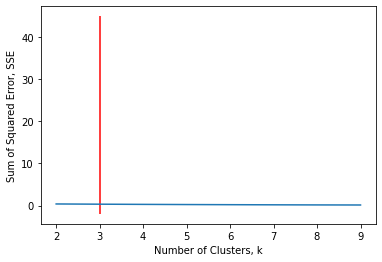

In [115]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


sse = {}
for n_cluster1 in range(2, 10):
    kmeans1 = KMeans(n_clusters = n_cluster1, max_iter = 500).fit(se_grouped_clustering)
    se_grouped_clustering["clusters"] = kmeans1.labels_
    
    
    sse[n_cluster1] = kmeans1.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of Clusters, k")
plt.ylabel("Sum of Squared Error, SSE")

plt.vlines(3, ymin = -2, ymax = 45, colors = 'red')
plt.show()

In [116]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for n_cluster2 in range(2, 10):
    kmeans2 = KMeans(n_clusters = n_cluster2, random_state = 0).fit(se_grouped_clustering)
    label2 = kmeans2.labels_
    sil_coeff = silhouette_score(se_grouped_clustering, label2, metric = 'euclidean')
    print("Where n_clusters = {}, the Silhouette Coefficient is {}".format(n_cluster2, sil_coeff))

Where n_clusters = 2, the Silhouette Coefficient is 0.6412498014258622
Where n_clusters = 3, the Silhouette Coefficient is 0.6255531812936334
Where n_clusters = 4, the Silhouette Coefficient is 0.6732518321963437
Where n_clusters = 5, the Silhouette Coefficient is 0.6935402049449741
Where n_clusters = 6, the Silhouette Coefficient is 0.7379758360926101
Where n_clusters = 7, the Silhouette Coefficient is 0.8048642536880231
Where n_clusters = 8, the Silhouette Coefficient is 0.8879414364572709
Where n_clusters = 9, the Silhouette Coefficient is 0.9342191696988277


In [117]:
se_clusters.columns


Index(['Location', 'Borough', 'Postcode', 'Latitude', 'Longitude',
       'Cluster Labels', '1st Most Common Venue', '2nd Most Common Venue',
       '3rd Most Common Venue', '4th Most Common Venue',
       '5th Most Common Venue', '6th Most Common Venue',
       '7th Most Common Venue', '8th Most Common Venue',
       '9th Most Common Venue', '10th Most Common Venue'],
      dtype='object')

In [118]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(se_clusters['Latitude'], se_clusters['Longitude'], se_clusters['Location'], se_clusters['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

display(map_clusters)

In [119]:
se_clusters.loc[se_clusters['Cluster Labels'] == 0, se_clusters.columns[[1] + list(range(5, se_clusters.shape[1]))]]


,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Southwark,0,Café,Pub,Park,Coffee Shop,Middle Eastern Restaurant,Italian Restaurant,Cocktail Bar,Pizza Place,Bar,Beer Bar
4,Southwark,0,Café,Pub,Park,Pizza Place,Italian Restaurant,Coffee Shop,Gym / Fitness Center,Garden Center,Grocery Store,Forest
13,Lambeth,0,Coffee Shop,Pub,Pizza Place,Café,Park,Cocktail Bar,Brewery,Market,Vegetarian / Vegan Restaurant,Restaurant
24,Southwark,0,Pub,Café,Pizza Place,Park,Gastropub,Italian Restaurant,Bar,Coffee Shop,Indie Movie Theater,Cocktail Bar
27,Southwark,0,Pub,Café,Pizza Place,Park,Gastropub,Italian Restaurant,Bar,Coffee Shop,Indie Movie Theater,Cocktail Bar
35,Lambeth,0,Coffee Shop,Pub,Café,Park,Pizza Place,Brewery,Bakery,Grocery Store,Gym / Fitness Center,Vegetarian / Vegan Restaurant
36,Lambeth,0,Coffee Shop,Pub,Café,Park,Pizza Place,Brewery,Bakery,Grocery Store,Gym / Fitness Center,Vegetarian / Vegan Restaurant
41,Lambeth,0,Café,Pub,Park,Coffee Shop,Middle Eastern Restaurant,Italian Restaurant,Cocktail Bar,Pizza Place,Bar,Beer Bar
43,Southwark,0,Café,Pub,Park,Coffee Shop,Middle Eastern Restaurant,Italian Restaurant,Cocktail Bar,Pizza Place,Bar,Beer Bar


In [120]:
se_clusters.loc[se_clusters['Cluster Labels'] == 1, se_clusters.columns[[1] + list(range(5, se_clusters.shape[1]))]]


,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Lewisham,1,Grocery Store,Pub,Park,Gym / Fitness Center,Café,Italian Restaurant,Coffee Shop,Train Station,Supermarket,Soccer Field
19,Lewisham,1,Grocery Store,Pub,Park,Gym / Fitness Center,Café,Italian Restaurant,Coffee Shop,Train Station,Supermarket,Soccer Field
26,Lewisham,1,Grocery Store,Supermarket,Park,Café,Italian Restaurant,Fast Food Restaurant,Coffee Shop,Pub,Hardware Store,Platform
32,Lewisham,1,Grocery Store,Supermarket,Park,Café,Italian Restaurant,Fast Food Restaurant,Coffee Shop,Pub,Hardware Store,Platform
44,Lewisham,1,Grocery Store,Supermarket,Park,Café,Italian Restaurant,Fast Food Restaurant,Coffee Shop,Pub,Hardware Store,Platform
45,Lewisham,1,Grocery Store,Pub,Park,Gym / Fitness Center,Café,Italian Restaurant,Coffee Shop,Train Station,Supermarket,Soccer Field


In [121]:
se_clusters.loc[se_clusters['Cluster Labels'] == 2, se_clusters.columns[[1] + list(range(5, se_clusters.shape[1]))]]


,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Southwark,2,Pub,Café,Park,Bakery,Coffee Shop,Grocery Store,Gym / Fitness Center,Farmers Market,Italian Restaurant,Brewery
9,Lewisham,2,Pub,Coffee Shop,Café,Grocery Store,Supermarket,Park,Gym / Fitness Center,Indian Restaurant,Forest,Pizza Place
10,Lambeth,2,Pub,Coffee Shop,Café,Park,Grocery Store,Italian Restaurant,Bakery,Train Station,Supermarket,Movie Theater
11,Lambeth,2,Pub,Coffee Shop,Café,Park,Grocery Store,Italian Restaurant,Bakery,Train Station,Supermarket,Movie Theater
15,Lewisham,2,Pub,Coffee Shop,Café,Grocery Store,Supermarket,Park,Gym / Fitness Center,Indian Restaurant,Forest,Pizza Place
29,Croydon,2,Pub,Park,Grocery Store,Supermarket,Coffee Shop,Platform,Café,Train Station,Tram Station,Hotel
31,Croydon,2,Pub,Park,Grocery Store,Supermarket,Coffee Shop,Platform,Café,Train Station,Tram Station,Hotel
37,Croydon,2,Pub,Coffee Shop,Park,Café,Italian Restaurant,Bakery,Grocery Store,Gastropub,Train Station,Movie Theater
39,Lewisham,2,Pub,Grocery Store,Coffee Shop,Park,Bakery,Italian Restaurant,Café,Supermarket,Garden,Pizza Place
40,Lambeth,2,Pub,Coffee Shop,Grocery Store,Café,Park,Bakery,Gym / Fitness Center,Pizza Place,Brewery,Pharmacy


In [122]:
se_clusters.loc[se_clusters['Cluster Labels'] == 3, se_clusters.columns[[1] + list(range(5, se_clusters.shape[1]))]]


,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Southwark,3,Pub,Café,Coffee Shop,Park,Italian Restaurant,Theater,Hotel,Street Food Gathering,Garden,Pizza Place
6,Southwark,3,Pub,Café,Coffee Shop,Park,Italian Restaurant,Theater,Hotel,Street Food Gathering,Garden,Pizza Place
7,Southwark,3,Pub,Café,Coffee Shop,Park,Italian Restaurant,Theater,Hotel,Street Food Gathering,Garden,Pizza Place
8,Southwark,3,Coffee Shop,Pub,Italian Restaurant,Theater,Hotel,Street Food Gathering,Bakery,Grocery Store,Park,Garden
18,Lambeth,3,Coffee Shop,Pub,Italian Restaurant,Theater,Hotel,Street Food Gathering,Bakery,Grocery Store,Park,Garden
22,Southwark,3,Pub,Coffee Shop,Café,Italian Restaurant,Park,Theater,Hotel,Street Food Gathering,Pizza Place,Bakery
23,Southwark,3,Pub,Coffee Shop,Café,Italian Restaurant,Park,Theater,Hotel,Street Food Gathering,Pizza Place,Bakery
30,Southwark,3,Coffee Shop,Pub,Italian Restaurant,Theater,Hotel,Street Food Gathering,Bakery,Grocery Store,Park,Garden


In [123]:
se_clusters.loc[se_clusters['Cluster Labels'] == 4, se_clusters.columns[[1] + list(range(5, se_clusters.shape[1]))]]


,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Lewisham,4,Pub,Coffee Shop,Café,Park,Cocktail Bar,Food Truck,Italian Restaurant,Bar,Gastropub,Supermarket
2,Lewisham,4,Pub,Coffee Shop,Café,Park,Bar,Garden,Vietnamese Restaurant,Market,Indie Movie Theater,Cocktail Bar
14,Lewisham,4,Pub,Café,Gastropub,Park,Garden,Food Truck,Coffee Shop,Restaurant,Fish & Chips Shop,Supermarket
16,Lewisham,4,Pub,Café,Coffee Shop,Park,Gastropub,Food Truck,Bar,Italian Restaurant,Fish & Chips Shop,Restaurant
17,Lewisham,4,Pub,Café,Coffee Shop,Park,Gastropub,Food Truck,Bar,Italian Restaurant,Fish & Chips Shop,Restaurant
20,Lewisham,4,Pub,Café,Gastropub,Park,Garden,Food Truck,Coffee Shop,Restaurant,Fish & Chips Shop,Supermarket
21,Lewisham,4,Pub,Coffee Shop,Café,Bar,Italian Restaurant,Park,Indie Movie Theater,Gastropub,Brewery,Indian Restaurant
25,Lambeth,4,Café,Pub,Park,Coffee Shop,Hotel,Italian Restaurant,Gastropub,Theater,Garden,Cricket Ground
28,Southwark,4,Pub,Brewery,Park,Coffee Shop,Café,Beer Bar,Bar,Vietnamese Restaurant,Food Truck,Music Venue
33,Lewisham,4,Pub,Coffee Shop,Café,Park,Cocktail Bar,Food Truck,Italian Restaurant,Bar,Gastropub,Supermarket


In [124]:
#4. Result
#The following are the highlights of the 5 clusters above:

#Pubs, Cafe, Coffee Shops are popular in the South East London.
#As for restaurants, the Italian Restaurants are very popular in the South East London area. Especially in Southwark and Lambeth areas.
#With the Lewisham area being the most condensed area of Africans in the South East Area, it is surprising to see how in the top 10 venues, you can barely see restaurants in the top 5 venues.
#Although, the Clusters have variations, a very visible presence is the predominance of pubs.

#5. Discussion and Conclusion
#It is very important to note that Clusters 2 and 3 are the most viable clusters to create a brand African Restaurant. Their proximity to other amenities and accessibility to station are paramount. These 2 clusters do not have top restaurants that could rival their standards if they are created. And the proximity to resources needed is paramount as Lewisham and Lambeth are not far out from Peckham (under Southwark).

#In conclusion, this project would have had better results if there were more data in terms of crime data within the area, traffic access and allowance of more venues exploration with the Foursquare (limited venues for free calls).

#Also, getting the ratings and feedbacks of the current restaurants within the clusters would have helped in providing more insight into the best location.